Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. 
Проверьте размер таблицы, типы переменных.

# Описание данных

user_data:

client – идентификатор пользователя

premium – является ли клиент премиум

age – возраст

logs:

client – идентификатор пользователя

success – результат (успех - 1, нет - 0)

platform – платформа

time – время в формате Unix




In [16]:
import pandas as pd
user = pd.read_csv('3_user_data.csv', sep=',')
logs = pd.read_csv('3_logs.csv', sep=',')

In [17]:
user.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [18]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


# Задание 1 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [19]:
print(f"platform принимает {logs['platform'].nunique()} уникальных значения")

platform принимает 3 уникальных значения


# Задание 2

С какой платформы осуществляется наибольшее количество успешных операций? (success == True)


Подсказка: вспомните команды из прошлого занятия 

Название_датафрейма.query('success == True').platform.value_counts()

а еще команда idxmax()

In [20]:
print(f"Больше всего успешных операций: \
{logs.query('success==True').platform.value_counts().max()}. \
Платформа: '{logs.query('success==True').platform.value_counts().idxmax()}'")


Больше всего успешных операций: 2019. Платформа: 'phone'


# Задание 3

Какой клиент совершил больше всего успешных операций?

Внимание: Несколько пользователей могли совершить одинаковое число успешных действий

Подсказка: вспомните команды из прошлого урока 

Название_датафрейма.query('success == True').client.value_counts()

также поможет команда max()

In [21]:
success_counts=logs.loc[logs.success==True].client.value_counts()
max_num=success_counts.max()
max_success_users=success_counts.loc[success_counts==max_num]
print(f"Индексы клиентов, совершивших наибольшее кол-во успешных операций: {max_success_users.index}.\n Количество данных операций: {max_num}")


Индексы клиентов, совершивших наибольшее кол-во успешных операций: Index([28719, 52870, 61468, 61473, 12179, 82563, 36165, 92584, 78349], dtype='int64', name='client').
 Количество данных операций: 41


# Задание 4

Объедините два датафрейма в один по столбцу 'client'

Подсказка: Название_датафрейма_1.merge(Название_датафрейма_2, on='client')

In [22]:
df=logs.merge(user, on='client')
df

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,35604,False,phone,1585459894,True,65
2,10931,True,computer,1585468629,False,28
3,41928,True,phone,1585446772,False,46
4,48925,True,phone,1585467880,False,33
...,...,...,...,...,...,...
3434,92584,True,computer,1585408896,False,28
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


# Задание 5

Какая платформа наиболее популярна среди премиумных клиентов? (premium == True)

In [23]:
print(f"Платформа \
'{df.query('premium==True').platform.value_counts().idxmax()}'. Использована \
{df.query('premium==True').platform.value_counts().max()} раз(а).")

Платформа 'phone'. Использована 246 раз(а).


# Задание 6

Сделайте выборку для премиальных клиентов (premium` == True) и для непримеальных.

На основе этих выборок постройте графики, первый - отображающий популярность использования различных платформ (столбец "platform") у премиальных пользователей и второй - платформы сради непримиальных пользователей. 

Подсказка: используйте sns.countplot(x=название_выборки["столбец"])

In [24]:
#premium
prem=df.query('premium==True')
prem

,client,success,platform,time,premium,age
1,35604,False,phone,1585459894,True,65
8,11983,True,phone,1585459511,True,68
11,99308,True,computer,1585409409,True,38
18,49625,False,phone,1585447789,True,65
23,53978,True,computer,1585408637,True,46
...,...,...,...,...,...,...
3366,20278,True,computer,1585456706,True,65
3394,78455,True,phone,1585459854,True,23
3396,57026,True,computer,1585438120,True,62
3417,2864,True,phone,1585459818,True,41


In [25]:
standart=df.query('premium==False')
standart

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
2,10931,True,computer,1585468629,False,28
3,41928,True,phone,1585446772,False,46
4,48925,True,phone,1585467880,False,33
5,32167,True,computer,1585457972,False,42
...,...,...,...,...,...,...
3434,92584,True,computer,1585408896,False,28
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [30]:
%pip install seaborn

<Axes: xlabel='platform', ylabel='count'>

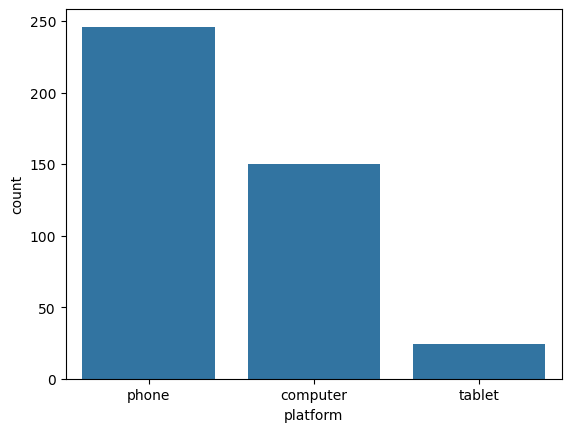

In [31]:
import seaborn as sns
sns.countplot(x=prem["platform"])

<Axes: xlabel='platform', ylabel='count'>

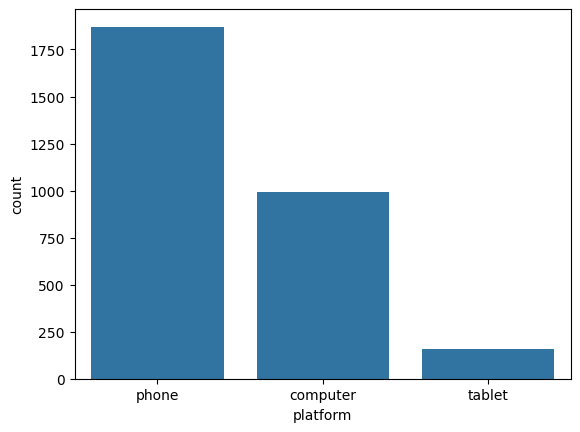

In [32]:
# Построение графика использования платформ среди непремиальных пользователей
sns.countplot(x=standart["platform"])

# Задание 7

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. 

Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки.

Подсказка: sns.countplot(data=Название_Датафрейма.loc[(Название_Датафрейма.platform == 'computer')
                                   & (Название_Датафрейма.success == True)], x='age')

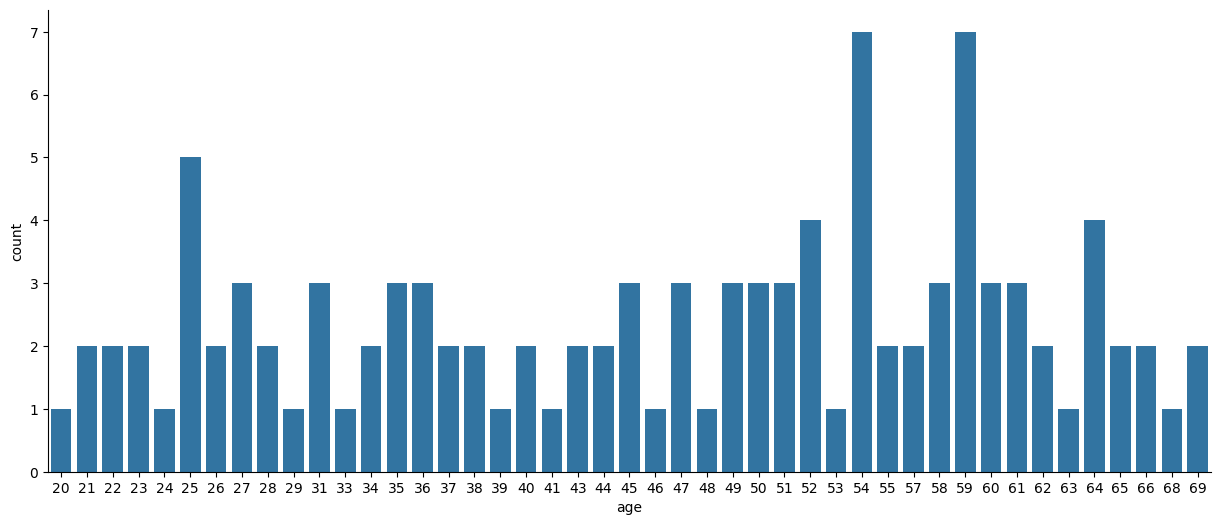

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
sns.countplot(x='age',data=prem.loc[(prem.platform=='computer')&(prem.success==True)])
sns.despine()